In [85]:
%load_ext autoreload
%autoreload 2

import glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from laughter_classification.sspnet_data_sampler import SSPNetDataSampler
from laughter_classification.visualization import plot_ROC_curve
from laughter_prediction.feature_extractors import LibrosaExtractor
from laughter_prediction.predictors import RnnPredictor

import IPython

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare dataset

In [2]:
sampler = SSPNetDataSampler('data/')
sampler.create_sampled_df(0.5, save_path='data/samples.csv')

100%|██████████| 2735/2735 [31:20<00:00,  1.45it/s]


saving df:  data/samples.csv


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V140,V141,V142,V143,V144,V145,V146,V147,IS_LAUGHTER,SNAME
0,732.393138,71.730946,18.811781,6.788904,1.256851,12.050013,-14.177780,11.033105,-3.771437,13.438529,...,12.632496,12.913792,12.849149,12.845300,12.995954,12.852365,12.055408,9.384016,0,S2330
1,707.722815,61.784646,24.083048,10.052187,-4.570591,8.642845,-10.488394,12.559437,-4.934037,9.276728,...,12.384186,12.613272,12.628318,12.640665,12.732609,12.761573,12.060279,9.472391,0,S2330
2,702.078893,53.761881,23.601383,16.117824,-11.179234,7.704747,-6.610195,10.509783,-2.372457,9.156685,...,12.341359,12.598996,12.583926,12.573610,12.647147,12.680543,12.004194,9.424703,0,S2330
3,709.102213,48.033687,15.201668,25.251352,-13.669874,4.338362,-2.421381,7.610244,-1.739835,8.621979,...,12.446506,12.442868,12.583451,12.647463,12.664171,12.683562,11.968918,9.396682,0,S2330
4,719.304609,39.097222,9.051807,37.277475,-20.162935,3.746672,3.278163,1.928466,0.064304,8.921334,...,12.591075,12.473268,12.609582,12.629720,12.697430,12.758391,11.973427,9.378987,0,S2330
5,725.832706,34.437153,3.145784,44.440589,-22.243378,0.216545,5.495193,2.486417,1.106292,6.730140,...,12.624747,12.587777,12.641927,12.712059,12.707625,12.760223,11.943537,9.217139,0,S2330
6,726.820336,34.351265,1.857470,47.461787,-21.037485,-1.368740,7.788297,3.440040,-0.544449,6.637986,...,12.607886,12.520222,12.485192,12.748621,12.785996,12.711961,11.913906,9.232942,0,S2330
7,726.527824,35.170828,2.490118,46.253175,-18.960738,-2.250999,5.760028,5.123916,0.792189,8.242901,...,12.609244,12.658277,12.491324,12.795867,12.846521,12.729714,11.928787,9.171473,0,S2330
8,720.409747,40.915951,4.740961,37.511237,-13.223977,-2.915503,0.974839,9.604959,0.974328,9.373985,...,12.481232,12.694856,12.557133,12.726009,12.739002,12.753091,12.021968,9.279068,0,S2330
9,723.031225,48.655122,4.225860,26.145456,-9.095993,2.456080,-4.222520,9.930063,1.399894,10.718757,...,12.494089,12.694941,12.548943,12.760432,12.808052,12.720033,11.933314,9.161982,0,S2330


In [5]:
df = pd.read_csv('data/samples.csv')

## Train model

In [6]:
NUM_MFCC = 20
NUM_FBANK = 128
BATCH_SIZE = 32
EPOCHS = 100

FRAMES = 85
FEATURES = df.shape[1] - 2

In [7]:
index = df['SNAME'].unique()
train_index, test_index = train_test_split(index)

train_df = df[df['SNAME'].isin(train_index)].drop(columns=['SNAME']).as_matrix()
test_df = df[df['SNAME'].isin(test_index)].drop(columns=['SNAME']).as_matrix()

X_train = train_df[:, :-1].reshape(len(train_index), FRAMES, FEATURES)
y_train = train_df[:, -1].reshape(len(train_index), FRAMES)

X_test = test_df[:, :-1].reshape(len(test_index), FRAMES, FEATURES)
y_test = test_df[:, -1].reshape(len(test_index), FRAMES)

In [17]:
model = RnnPredictor(FRAMES, NUM_MFCC, NUM_FBANK)

In [18]:
model.fit(X_train, y_train, BATCH_SIZE, EPOCHS)

Epoch 1/100
2051/2051 [==============================] - 17s - loss: 0.5359 - dense_7_loss: 0.3758 - dense_8_loss: 0.1601 - dense_7_acc: 0.8665 - dense_8_acc: 0.9637    
Epoch 2/100
2051/2051 [==============================] - 13s - loss: 0.3286 - dense_7_loss: 0.1718 - dense_8_loss: 0.1568 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 3/100
2051/2051 [==============================] - 14s - loss: 0.3120 - dense_7_loss: 0.1566 - dense_8_loss: 0.1554 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 4/100
2051/2051 [==============================] - 14s - loss: 0.3074 - dense_7_loss: 0.1529 - dense_8_loss: 0.1546 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 5/100
2051/2051 [==============================] - 14s - loss: 0.3041 - dense_7_loss: 0.1516 - dense_8_loss: 0.1525 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 6/100
2051/2051 [==============================] - 14s - loss: 0.3032 - dense_7_loss: 0.1509 - dense_8_loss: 0.1523 - dense_7_acc: 0.9637 - dens

2051/2051 [==============================] - 14s - loss: 0.2613 - dense_7_loss: 0.1308 - dense_8_loss: 0.1305 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 49/100
2051/2051 [==============================] - 14s - loss: 0.2591 - dense_7_loss: 0.1298 - dense_8_loss: 0.1293 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 50/100
2051/2051 [==============================] - 14s - loss: 0.2597 - dense_7_loss: 0.1301 - dense_8_loss: 0.1297 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 51/100
2051/2051 [==============================] - 14s - loss: 0.2606 - dense_7_loss: 0.1304 - dense_8_loss: 0.1302 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 52/100
2051/2051 [==============================] - 14s - loss: 0.2591 - dense_7_loss: 0.1298 - dense_8_loss: 0.1293 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 53/100
2051/2051 [==============================] - 14s - loss: 0.2586 - dense_7_loss: 0.1294 - dense_8_loss: 0.1292 - dense_7_acc: 0.9637 - dense_8_acc

2051/2051 [==============================] - 14s - loss: 0.2534 - dense_7_loss: 0.1267 - dense_8_loss: 0.1267 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 96/100
2051/2051 [==============================] - 14s - loss: 0.2526 - dense_7_loss: 0.1263 - dense_8_loss: 0.1263 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 97/100
2051/2051 [==============================] - 14s - loss: 0.2526 - dense_7_loss: 0.1264 - dense_8_loss: 0.1262 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 98/100
2051/2051 [==============================] - 14s - loss: 0.2526 - dense_7_loss: 0.1264 - dense_8_loss: 0.1262 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 99/100
2051/2051 [==============================] - 14s - loss: 0.2524 - dense_7_loss: 0.1263 - dense_8_loss: 0.1260 - dense_7_acc: 0.9637 - dense_8_acc: 0.9637    
Epoch 100/100
2051/2051 [==============================] - 14s - loss: 0.2522 - dense_7_loss: 0.1263 - dense_8_loss: 0.1259 - dense_7_acc: 0.9637 - dense_8_ac

In [21]:
model.save('model')

## Metrics

In [38]:
y_pred = model.predict(X_test)
f'Accuracy: {np.sum(y_test == y_pred) / len(y_test)}'

'Accuracy: 82.08333333333333'

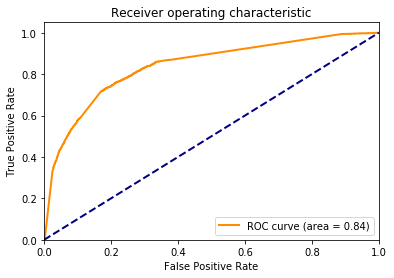

In [49]:
plot_ROC_curve(model.predict_proba(X_test).flatten(), y_test.flatten())

In [56]:
y_pred = model.predict(X_test, threshold=0.5)
f'Accuracy: {np.sum(y_test == y_pred) / len(y_test)}'

'Accuracy: 82.08333333333333'

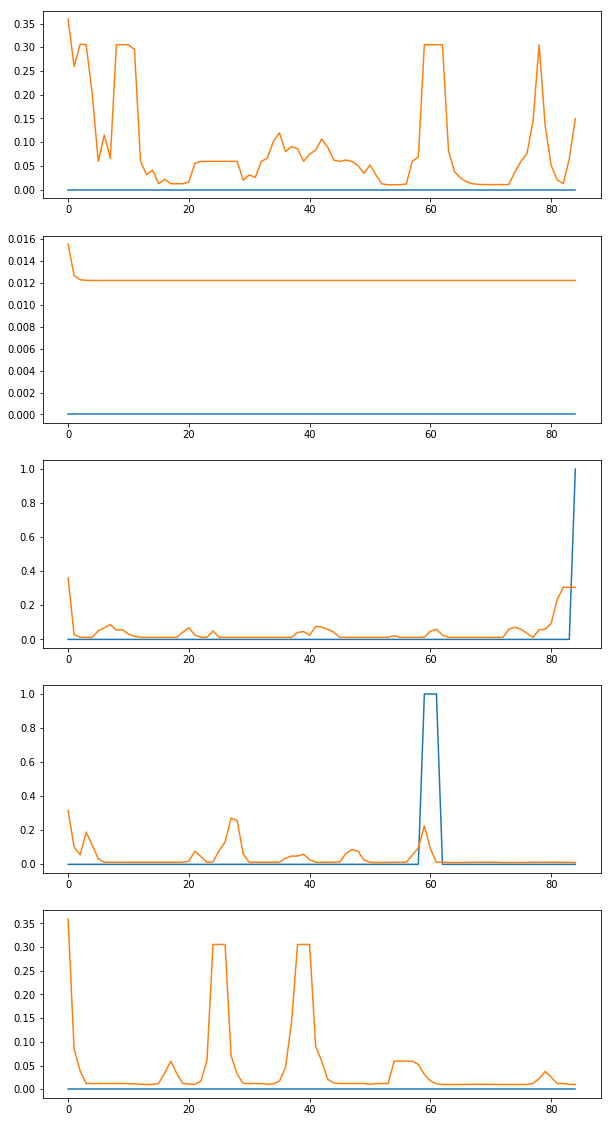

In [79]:
_, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
for i in range(5):
    idx = np.random.randint(X_test.shape[0])
    y_proba = model.predict_proba(X_test[idx: idx+1])
    ax[i].plot(np.arange(0, FRAMES), y_test[idx])
    ax[i].plot(np.arange(0, FRAMES), y_proba)


## Adding noise (hw 1)

In [91]:
def get_random_noise():
    noise_filenames = glob.glob('./data/bg_noise/**/*.wav', recursive=True)
    filename = np.random.choice(noise_filenames)
    return librosa.load(filename)[0]


def add_noise(filename, noise_rate):
    y, sr = librosa.load(filename)
    noise = get_random_noise()
    noise = np.tile(noise, len(y) // len(noise) + 1)
    return y * (1 - noise_rate) + noise[:len(y)] * noise_rate, sr

In [88]:
y, sr = librosa.load('data/data/S0001.wav')
IPython.display.Audio(y, rate=sr)

In [92]:
y, sr = add_noise('data/data/S0001.wav', 0.2)
IPython.display.Audio(y, rate=sr)


## Plot with noise

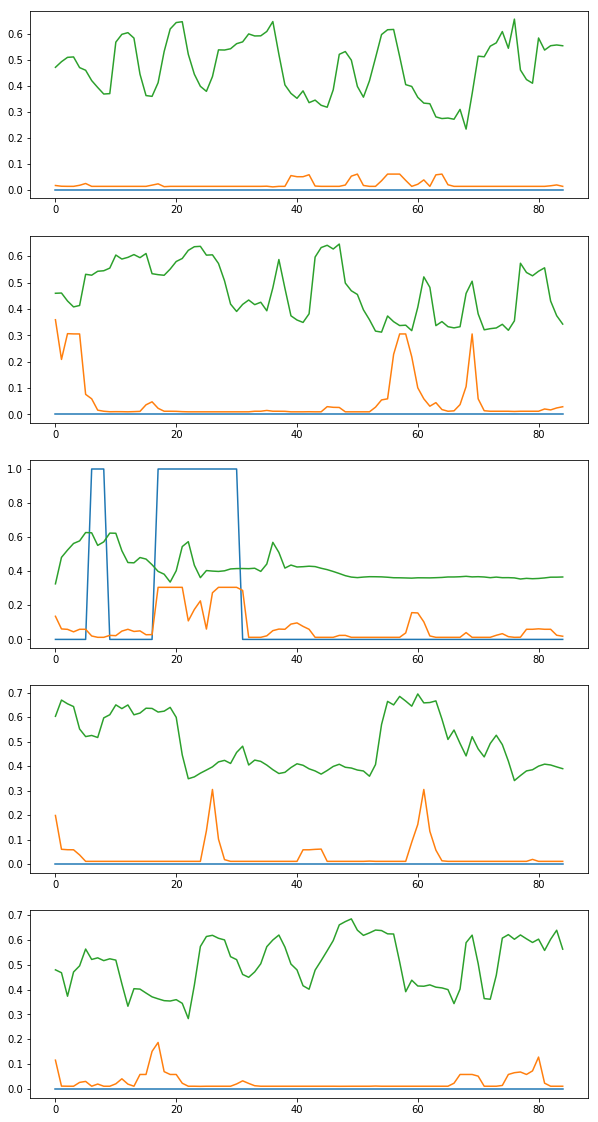

In [99]:
_, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
for i in range(5):
    idx = np.random.randint(X_test.shape[0])
    ax[i].plot(np.arange(0, FRAMES), y_test[idx])
    ax[i].plot(np.arange(0, FRAMES), model.predict_proba(X_test[idx: idx+1]))

    filename = f'data/data/{test_index[idx]}.wav'
    
    x_noise, rate = add_noise(filename, 0.2)    
    x_noise = LibrosaExtractor().extract_features(rate, x_noise)
    x_noise = x_noise.as_matrix()
    x_noise = np.expand_dims(x_noise, 0)
    ax[i].plot(np.arange(0, FRAMES), model.predict_proba(x_noise))
